#### Week 4 handin

# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015



## 02 Status
Did exercise one, the mandatory one.


## 03 Solution

In [20]:
# 1 Open the file './data/befkbhalderstatkode.csv'
# 2 Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
import numpy as np
file= "./data/befkbhalderstatkode.csv"
data: np.ndarray = np.genfromtxt(file, delimiter=",", dtype=np.uint, skip_header=1)
print (data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [21]:
#3 Using this data:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
# Find out how many people lived in each of the 11 areas in 2015

def sum_of_people_in_hood(n,cities):
    people_in_hood=data[(data[:,0]==2015)&(data[:,1]==n)]
    sum_in_hood=people_in_hood[:,4].sum()
    cities.setdefault(neighb[n],sum_in_hood)

cities=dict()
[sum_of_people_in_hood(n,cities) for n in neighb.keys()]
print (cities)

#persons_in_hoods_2015=np.array([sum_of_people_in_hood(n)for n in set(data[:,1])])
#print ('People in each hood in 2015:\n',persons_in_hoods_2015)


{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


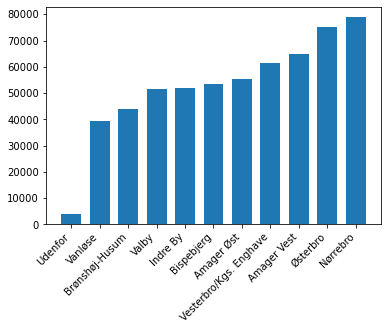

In [22]:
#4 Make a bar plot to show the size of each city area from the smallest to the largest in 2015
import matplotlib.pyplot as pl
sorted_people = dict(sorted(cities.items(), key=lambda x: x[1]))

pl.bar(list(sorted_people.keys()), list(sorted_people.values()),width=0.7, align='center')
pl.xticks(rotation=45, horizontalalignment='right')
pl.show()

In [23]:
#5 Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
mask_old=(data[:,2]>65) & (data[:,0] == 2015)
op2015=data[mask_old]
print(np.sum(op2015[:,4]))

55750


In [24]:
#6 How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
nordic_countries = [5110,5120,5104,5106,5101]
nordic_citizens = 0
for country_key in nordic_countries:
    mask = (data[:,3] == country_key) & (data[:,0] == 2015)&(data[:,2]>65)
    nordic_citizens += (data[mask][0:,4].sum())
print("Nordiske beboere over 65: ",nordic_citizens)


Nordiske beboere over 65:  608.0


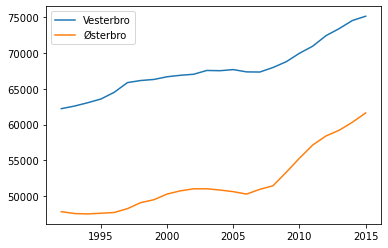

In [52]:
#7 Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
year_1992_2015_mask=(data[:,0]>1991)&(data[:,0]<2016)
relevant_years=data[year_1992_2015_mask]

mask_vesterbro=(relevant_years[:,1]==2)
vesterbro=relevant_years[mask_vesterbro]

mask_osterbro=(relevant_years[:,1]==4)
osterbro=relevant_years[mask_osterbro]
years=list(range(1992,2016))

def number_of_people_per_mask_years(hood,hood_label):
    sd = dict()
    for n in range(1992,2016):
        hood_year_mask=(hood[:,0]==n)
        hood_year=hood[hood_year_mask]
        sum_of_people = hood_year[:,4].sum() # index 4 is no of 'PERSONER'
        sd.setdefault(n, sum_of_people)
    pl.plot(list(sd.keys()), list(sd.values()),label=hood_label)
    
number_of_people_per_mask_years(vesterbro,"Vesterbro")
number_of_people_per_mask_years(osterbro,"Østerbro")
pl.legend()